# Kullanılan veri seti

*https://www.kaggle.com/datasets/santurini/semantic-segmentation-drone-dataset*

# Veri seti hazırlama 
Veri setimizi hazırlamak için ilk olarak, `böl.py` betiğini kullanarak veri setindeki görselleri 256 nın katına yeniden boyutlandıracaz ardından resimleri 256x256 boyutlarında parçalara böleceğiz. Daha sonra, işlenen veri setini Google Drive'a yüklenmesi gerek.

# Yardım alınan kaynaklar

*https://www.youtube.com/watch?v=XyX5HNuv-xE&t=884s*

*https://www.youtube.com/watch?v=jvZm8REF2KY*

*https://www.youtube.com/watch?v=aUHoDeo3DFg&t=3095s*



# Google Colab ile Google Drive'ı Bağlama


In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

# Gerekli Kütüphanelerin Yüklenmesi

In [ ]:
!pip install opencv-python matplotlib scikit-learn tensorflow

# Google Drive'daki Hedef Dizinine Geçiş ve Mevcut Dizin Kontrolü

Bu bölümde, Python'un `os` modülünü kullanarak çalışma dizinini veri setinin bulunduğu dizin olarak değiştireceğiz.


In [2]:
import os

# Hedef dizini belirtin
directory_path = '/content/drive/MyDrive/UNET' # Google Drive'da bulunan veriseitini konumu

# Dizin değiştirme
os.chdir(directory_path)

# Mevcut dizini kontrol etme
current_directory = os.getcwd()
print(f"Mevcut dizin: {current_directory}")

Mevcut dizin: /content/drive/MyDrive/UNET


# Veri Kümesi Yükleme ve Ön İşleme

Bu bölümde, normal görüntüleri ve maskeleri içeren veri kümesini yükleyeceğiz, maskeleri etiketlere dönüştüreceğiz ve veri kümesini eğitim ve test setlerine böleceğiz.

1. **Veri Yükleme**: Normal görüntüleri ve maskeleri içeren klasörlerden dosyaları okur ve eşleşen dosyaları belirler.
2. **Ön İşleme**: Normal görüntülerini normalize eder ve maskeleri RGB'den 2D etiketlere dönüştürür.
3. **Veri Seti Bölme**: Veriyi eğitim ve test setlerine böler.


In [3]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Görsellerin bulunduğu klasör yolları
sat_folder = 'img/img/'  # Normal görseller klasörü
mask_folder = 'img/seg/' # Maske görselleri klasörü

# Dosya adlarını al
sat_files = os.listdir(sat_folder)
mask_files = os.listdir(mask_folder)

# Dosyaları sıralama
sat_files.sort()
mask_files.sort()

matched_sat_files = []
matched_mask_files = []
i = -1
for sat_file in sat_files:
    i += 1
    print(i)
    
    # Mask dosya adını normal görsel dosya adından türetme
    corresponding_mask_file = sat_file.replace('sat', 'mask')
    corresponding_mask_file = corresponding_mask_file.replace(".jpg", ".png")

    # Eğer eşleşen mask dosyası varsa, dosyaları okuma
    if corresponding_mask_file in mask_files:
        sat_path = os.path.join(sat_folder, sat_file)    # Normal görsel yolu
        mask_path = os.path.join(mask_folder, corresponding_mask_file)  # Maske görseli yolu
        sat = cv2.imread(sat_path)  # Normal görseli okuma
        mask = cv2.imread(mask_path)  # Maske görselini okuma
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)  # Maske görselini RGB formatına çevirme

        # Normal görseli normalize etme
        sat = (sat.astype(np.float32)) / 255.0

        matched_sat_files.append(sat)
        matched_mask_files.append(mask)

# Listeleri NumPy dizilerine dönüştürme
sat_images = np.array(matched_sat_files)
mask_images = np.array(matched_mask_files)

# Her sınıf için RGB değerlerini tanımlama
obstacles = np.array([155, 38, 182])  # Engeller
water = np.array([14, 135, 204])     # Su
nature = np.array([124, 252, 0])     # Doğa
moving = np.array([255, 20, 147])    # Hareketli
landable = np.array([169, 169, 169]) # İniş yapılabilir

def rgb_to_2D_label(label):
    label_seg = np.zeros(label.shape[:2], dtype=np.uint8)
    label_seg[np.all(label == obstacles, axis=-1)] = 0
    label_seg[np.all(label == water, axis=-1)] = 1
    label_seg[np.all(label == nature, axis=-1)] = 2
    label_seg[np.all(label == moving, axis=-1)] = 3
    label_seg[np.all(label == landable, axis=-1)] = 4
    return label_seg

# Maske görsellerini 2D etiketlere dönüştürme
labels = []
for i in range(mask_images.shape[0]):
    label = rgb_to_2D_label(mask_images[i])
    labels.append(label)

# Etiketleri NumPy dizisine dönüştürme ve son bir eksen ekleme
labels = np.array(labels)
labels = np.expand_dims(labels, axis=-1)

print("Etiket veri setinde bulunan benzersiz etiketler: ", np.unique(labels))
print(labels.shape)

# 2D etiketleri kategorik formata dönüştürme
labels_cat = to_categorical(labels, num_classes=5)
print(labels_cat.shape)

# Veri kümesini eğitim ve test setlerine bölme
x_train, x_test, y_train, y_test = train_test_split(sat_images, labels_cat, test_size=0.10, random_state=42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

IndexError: index 124 is out of bounds for axis 1 with size 5

# Görsel ve Etiketlerin Görselleştirilmesi

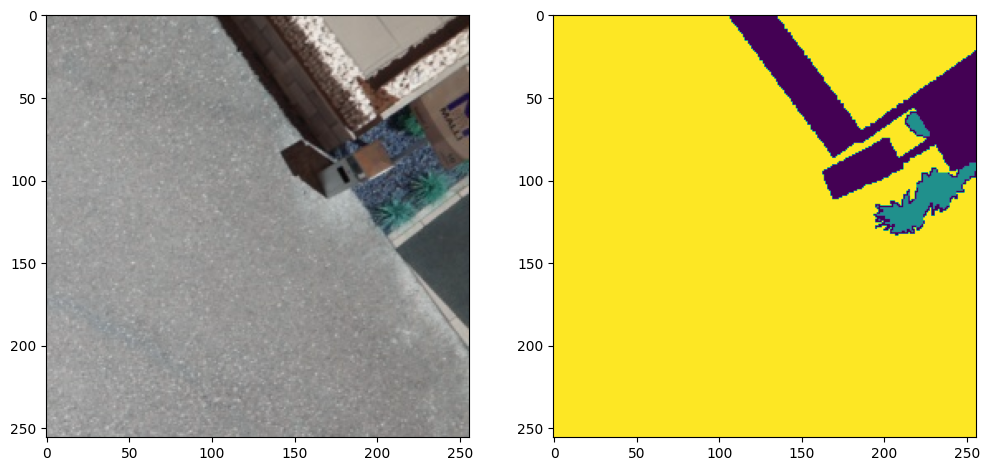

In [ ]:
import random
import numpy as np
from matplotlib import pyplot as plt

image_number = random.randint(0, len(sat_images))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(sat_images[2])
plt.subplot(122)
plt.imshow(labels[2])
plt.show()


# Model Tanımlama ve Derleme

Bu bölümde, `multi_unet_model` fonksiyonunu kullanarak çeşitli hiperparametrelerini belirledikten sonra U-Net modelini oluşturacağız.

1. **Model Parametreleri**: Etiket sayısı, görüntü yüksekliği, genişliği ve kanalları gibi parametreler belirlenir.
2. **Model Oluşturma**: `multi_unet_model` fonksiyonu kullanılarak model oluşturulur.
3. **Model.Compile**: Model, `adam` optimizasyon algoritması ve `categorical_crossentropy` kayıp fonksiyonu kullanıldı.
4. **Model.Summary**: Modelin yapısı ve katmanları özet olarak görüntülenir.


In [ ]:
from simple_multi_unet_model import multi_unet_model

# Etiket sayısını ve görüntü boyutlarını belirleme
n_classes = len(np.unique(labels))  # Sınıf sayısı (benzersiz etiket sayısı)
IMG_HEIGHT = X_train.shape[1]       # Görüntü yüksekliği
IMG_WIDTH  = X_train.shape[2]       # Görüntü genişliği
IMG_CHANNELS = X_train.shape[3]     # Görüntü kanalları
print(n_classes)

def get_model():
    # Modeli oluşturma ve döndürme
    return multi_unet_model(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)

# Modeli oluşturma
model = get_model()

# Modeli derleme
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model özetini görüntüleme
model.summary()


5
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                            

# Model Eğitim ve Kaydetme

Bu bölümde, oluşturduğumuz modeli eğitim verileri ile eğitecek ve ardından eğitilmiş modeli kaydedeceğiz.

1. **Model Eğitimi**: Model, belirtilen hiperparametrelerle eğitim verileri üzerinde eğitilir.
   - `batch_size`: Eğitim sırasında kullanılan batch boyutu.
   - `epochs`: Eğitim döngü sayısı.
   - `verbose`: Eğitim sırasında bilgi seviyesini belirler.
   - `validation_data`: Modelin doğruluk ve kaybını izlemek için doğrulama verileri.
   - `shuffle`: Eğitim verilerinin her epoch'tan önce karıştırılıp karıştırılmayacağını belirler.
2. **Model Kaydetme**: Eğitim tamamlandıktan sonra, model belirli bir dosya adıyla kaydedilir.


In [ ]:
# Modeli eğitme
history1 = model.fit(
    x_train,                # Eğitim verileri
    y_train,                # Eğitim etiketleri
    batch_size=16,          # Eğitim sırasında kullanılan batch boyutu
    epochs=50,              # Eğitim döngü sayısı
    verbose=1,              # Eğitim sırasında bilgi seviyesini belirler (1: detaylı bilgi)
    validation_data=(x_test, y_test),  # Modelin doğruluk ve kaybını izlemek için doğrulama verileri
    shuffle=False          # Eğitim verilerinin her epoch'tan önce karıştırılmasını kontrol eder
)

# Eğitilmiş modeli kaydetme
model.save('Model.hdf5')  # Model dosya adı


Epoch 1/50
68/68 [==============================] - 42s 293ms/step - loss: 1.0706 - accuracy: 0.6039 - val_loss: 0.8527 - val_accuracy: 0.7512
Epoch 2/50
68/68 [==============================] - 13s 197ms/step - loss: 0.8132 - accuracy: 0.7510 - val_loss: 0.7860 - val_accuracy: 0.7545
Epoch 3/50
68/68 [==============================] - 14s 203ms/step - loss: 0.7422 - accuracy: 0.7567 - val_loss: 0.7276 - val_accuracy: 0.7785
Epoch 4/50
68/68 [==============================] - 14s 203ms/step - loss: 0.6920 - accuracy: 0.7616 - val_loss: 0.6602 - val_accuracy: 0.7809
Epoch 5/50
68/68 [==============================] - 14s 203ms/step - loss: 0.6639 - accuracy: 0.7645 - val_loss: 0.6919 - val_accuracy: 0.7799
Epoch 6/50
68/68 [==============================] - 14s 202ms/step - loss: 0.6390 - accuracy: 0.7669 - val_loss: 0.6713 - val_accuracy: 0.7829
Epoch 7/50
68/68 [==============================] - 14s 204ms/step - loss: 0.6185 - accuracy: 0.7704 - val_loss: 0.6676 - val_accuracy: 0.7830

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Modeli Yükleme ve Test Görselleri Üzerinde Tahmin Yapma


1/1 [==============================] - 0s 234ms/step


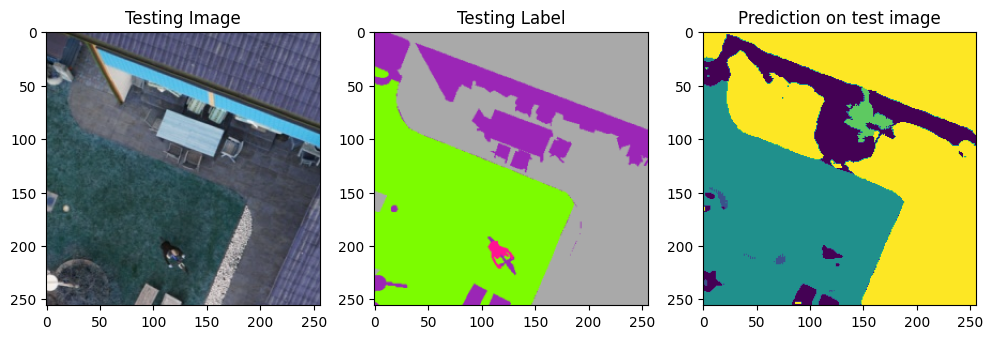

In [ ]:
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
import random
import numpy as np

# Eğitilmiş modeli yükleme
model = load_model("satellite_standard_unet_100epochs_7May2023.hdf5")

# Rastgele bir test görseli seçimi
test_img_number = random.randint(0, len(X_test) - 1)  # Test veri kümesinden rastgele bir indeks seçme
test_img = sat_images[test_img_number]                 # Seçilen test görseli
ground_truth = mask_images[test_img_number]            # Seçilen test görseline ait gerçek etiket

# Test görselini normalize etme ve model girişi için hazırlama
test_img_norm = test_img[:, :, 0][:, :, None]          # Normalizasyon (tek kanal)
test_img_input = np.expand_dims(test_img, 0)           # Model girişi için bir eksen ekleme

# Tahmin yapma
prediction = model.predict(test_img_input)              # Model tahmini
predicted_img = np.argmax(prediction, axis=3)[0, :, :]  # Tahmin sonuçlarının sınıflara göre argmax'ini alma

# Sonuçları görselleştirme
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Test Görseli')
plt.imshow(test_img)
plt.subplot(232)
plt.title('Gerçek Etiket')
plt.imshow(ground_truth)
plt.subplot(233)
plt.title('Test Görseli Üzerindeki Tahmin')
plt.imshow(predicted_img)
plt.show()
